# assignment 07

# LeeKangJin 20135619 

# git link 
    
   https://github.com/LeeKangJin/assignment

# Import Package

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Given Function and Noisy data

x : x-coordinate data

y1 :(noisy) y-coordinate data

y2 : (clean) y-coordinate data 

# Given Function F  & Number & Standard Deviation

In [94]:
def fun(x):

   # f = np.sin(x) * (1 / (1 + np.exp(-x)))
    f = np.abs(x) * np.sin(x)

    return f

num = 1001
std = 5

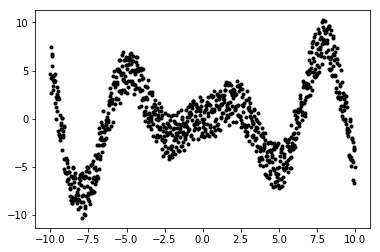

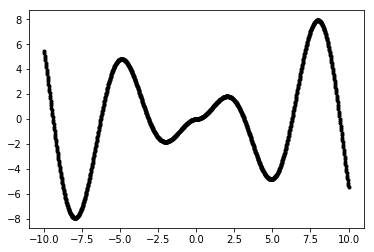

In [93]:
n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x)
y2      = y1 + nn * std

plt.plot(x, y2, 'k.') # nosiy data
plt.show()


plt.plot(x, y1, 'k.') # clean
plt.show()

# function of making A matrix

$$
x =  \left[ {\begin{array}{ccccc}
  x_0 \\
  \vdots \\
  x_n
  \end{array} } \right] 
$$

$$
   A_n=
  \left[ {\begin{array}{ccccc}
   x^0  & \dots & x^n 
  \end{array} } \right]
$$


In [92]:
def Amatrix(n,x_matrix):
    one_matrix = np.ones(num)
    Amatrix = one_matrix

    for i in range( n+1 ):
        if i == 0 :
            # init (1)
            Amatrix = Amatrix.reshape((num, 1))

        else :
            # add (x^1, x^2,x^3 ...x^n)
            
            x_n = x_matrix**(i)
            x_n = x_n.reshape((num,1))
            Amatrix = np.column_stack((Amatrix,x_n))
            
    return Amatrix

# Calculate Sudo Inverse of each A

[[-3.92047506e-16]]


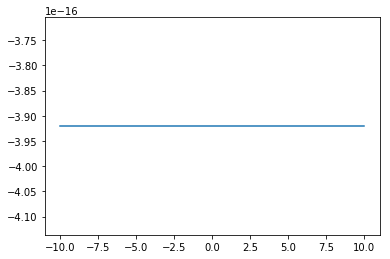

[[-5.11743425e-16]
 [ 2.02420945e-01]]


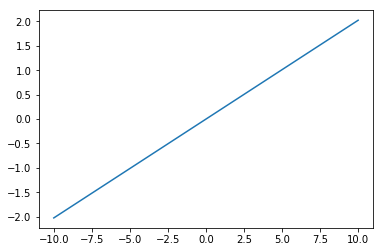

[[ 0.06601239]
 [ 0.20242095]
 [-0.00197642]]


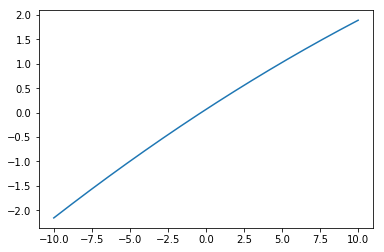

[[ 0.06601239]
 [-0.13775034]
 [-0.00197642]
 [ 0.00565821]]


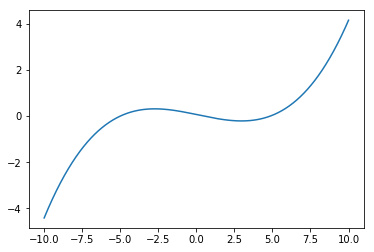

[[ 1.24670800e-01]
 [-1.37750342e-01]
 [-7.83057907e-03]
 [ 5.65821257e-03]
 [ 6.81624392e-05]]


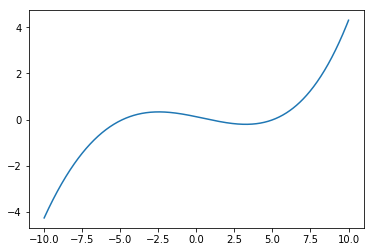

[[ 1.24670800e-01]
 [-1.50123486e+00]
 [-7.83057907e-03]
 [ 6.91609503e-02]
 [ 6.81624392e-05]
 [-5.70387288e-04]]


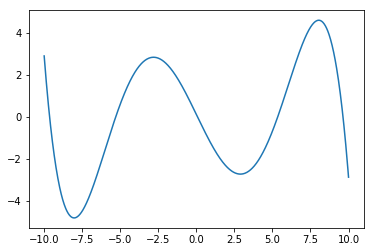

[[ 6.59801573e-02]
 [-1.50123486e+00]
 [ 4.47000230e-03]
 [ 6.91609503e-02]
 [-3.00122361e-04]
 [-5.70387288e-04]
 [ 2.69538958e-06]]


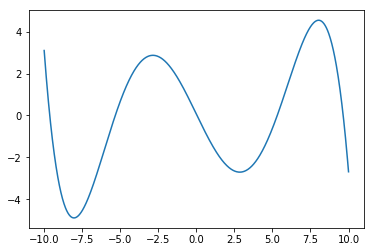

[[ 6.59801573e-02]
 [ 4.06345288e-01]
 [ 4.47000230e-03]
 [-1.02181320e-01]
 [-3.00122361e-04]
 [ 3.19167371e-03]
 [ 2.69538958e-06]
 [-2.32427734e-05]]


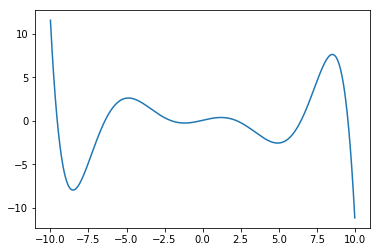

[[ 1.94119824e-01]
 [ 4.06345288e-01]
 [-4.15692122e-02]
 [-1.02181320e-01]
 [ 2.22703235e-03]
 [ 3.19167371e-03]
 [-4.10220358e-05]
 [-2.32427734e-05]
 [ 2.33737226e-07]]


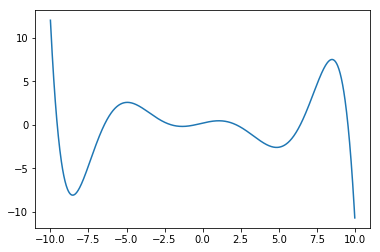

[[ 1.94119824e-01]
 [ 2.14790574e+00]
 [-4.15692122e-02]
 [-3.57107302e-01]
 [ 2.22703235e-03]
 [ 1.31142000e-02]
 [-4.10220358e-05]
 [-1.64713696e-04]
 [ 2.33737226e-07]
 [ 6.66739214e-07]]


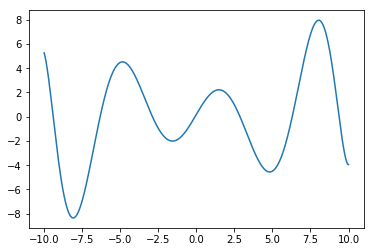

In [97]:
test_case_distance =[0,0,0,0,0,0,0,0,0,0]
test_case = [0,1,2,3,4,5,6,7,8,9]

for i in range(0,10):
    
    A = Amatrix(i,x)
    
    A_transpose = A.transpose()

    Sudo_InverseA = np.matmul(A_transpose,A)
    Sudo_InverseA = np.linalg.inv(Sudo_InverseA)
    Sudo_InverseA = np.matmul(Sudo_InverseA,A_transpose)
    
    data_size = np.shape(y2)[0]
    
    b = y2.reshape((data_size,1))
    
    soluation = np.matmul(Sudo_InverseA,b)

    polinomial_grape = np.matmul(A,soluation)
    print(soluation)
    sum = 0

    for k in range(len(y2)):
        sum += (y2[k] - polinomial_grape[k])*(y2[k] - polinomial_grape[k]) # y값 어떻게 뽑지?
    
    
    test_case_distance[i] = sum 
    
    plt.plot(x,polinomial_grape)
    plt.show()


# Test case distance plot

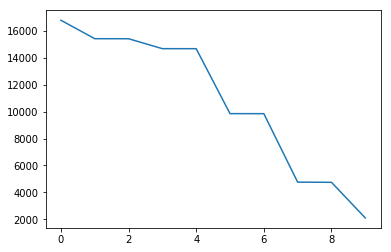

In [96]:
plt.plot(test_case,test_case_distance)
plt.show()